(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [3]:
import io # I assume that using a default python library is fine
# Read the entire file as text
with open('data/Task1-2.ToyotaCorolla-raw.csv', 'r', encoding='utf-8') as f:
    raw_text = f.read()

# fix special cases where where the wrong delimiter is used
fixed_text = raw_text.replace(';', ',')

# Remove the first instance of a comma in line 33 so we can load the csv 
lines = fixed_text.split('\n')
lines[32] = lines[32].replace(',', '', 1)
fixed_text = '\n'.join(lines)

# Use StringIO to create a file-like object from our fixed text.
fixed_csv = io.StringIO(fixed_text)

# Now we can load hte csv
df = pd.read_csv(fixed_csv)

# We clean the price column by removing special symbols and commas 
# (special cases 15,398,499999999998 - here the second comma has to be replaced with '.' )
df['Price'] = (df['Price']
               .astype(str)
               .apply(lambda x: x.replace(',', '', 1).replace(',', '.', 1))
               .str.replace('"', '')
               .str.replace('£', '')
               .astype(float))

# We clean the mileage column by removing a special symbol (ß) and converting to float
df['Mileage'] = (df['Mileage']
                 .astype(str)
                 .str.replace('ß', '')  
                 .astype(float))


display(df.head(5))
print(df.shape)
print(df.dtypes)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF


(1437, 11)
Price        float64
Age            int64
Mileage      float64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
Currency      object
dtype: object


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [8]:
#TODO
nan_rows = df[df.isna().any(axis=1)]
display(nan_rows)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
906,8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


after fix (*the fix is now added in the file reading section at the top)

In [4]:
nan_rows = df[df.isna().any(axis=1)]
display(nan_rows)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [5]:
#TODO
df['Price'] = (df['Price']
               .astype(str)
               .str.replace('"', '')  # Remove quotes
               .str.replace(',', '')  # Remove commas
               .astype(float))        # Convert to float

# We can check the dtype of the price now
print(df['Price'].describe())

# Compute mean price
mean_price = df['Price'].mean()
# Compute median price
median_price = df['Price'].median()

print(f'\nMean price: {mean_price}')
print(f'Median price: {median_price}')

count     1437.000000
mean      9439.505810
std       3223.323161
min       3758.000000
25%       7343.000000
50%       8595.000000
75%      10323.000000
max      28074.000000
Name: Price, dtype: float64

Mean price: 9439.505809951286
Median price: 8595.0


In [6]:
# Sanity check: some special cases were converted correctly
display(df['Price'][31])
display(df['Price'][34])
display(df['Price'][1369])

15646.9

15398.499999999998

4089.9999

**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [7]:
#TODO

chf = 1.05
gbp = 1.15
mile = 1.61

def convert_eur(row):
    if row['Currency'] == 'CHF':
        row['Price'] = row['Price'] * chf
    elif row['Currency'] == 'GBP':
        row['Price'] = row['Price'] * gbp
    return round(row['Price'])

def convert_km(row):
    if row['Currency'] == 'GBP':
        row['Mileage'] = row['Mileage'] * mile
    return round(row['Mileage'])

df['Price'] = df.apply(convert_eur, axis=1)
df['Mileage'] = df.apply(convert_km, axis=1)

df = df.drop('Currency', axis=1)

In [8]:
price_stats = df['Price'].agg(['min', 'mean', 'median', 'max'])
mileage_stats = df['Mileage'].agg(['min', 'mean', 'median', 'max'])

print("Price info (EUR):")
print(price_stats)
print("\nMileage info (km):")
print(mileage_stats)

Price info (EUR):
min        3946.000000
mean       9879.322895
median     9025.000000
max       29478.000000
Name: Price, dtype: float64

Mileage info (km):
min            1.000000
mean       68491.092554
median     63328.000000
max       243000.000000
Name: Mileage, dtype: float64


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [9]:
#TODO
display(df['FuelType'].value_counts())
display(df['Doors'].value_counts())

FuelType
Petrol    1265
Diesel     155
CNG         17
Name: count, dtype: int64

Doors
5    674
3    623
4    138
2      2
Name: count, dtype: int64

In [10]:
avg_price_fuel_type = df.groupby('FuelType')['Price'].mean().sort_values(ascending=False)
avg_price_num_doors = df.groupby('Doors')['Price'].mean().sort_values(ascending=False)

print("Average price by fuel type:")
display(avg_price_fuel_type)
print("Fuel type with highest avg. price: ", avg_price_fuel_type.index[0])

print("\nAverage price by number of doors:")
display(avg_price_num_doors)
print("Num doors with highest avg. price: ", avg_price_num_doors.index[0])

Average price by fuel type:


FuelType
Diesel    10366.490323
Petrol     9834.777866
CNG        8752.176471
Name: Price, dtype: float64

Fuel type with highest avg. price:  Diesel

Average price by number of doors:


Doors
5    10578.637982
3     9320.285714
4     9024.297101
2     7347.000000
Name: Price, dtype: float64

Num doors with highest avg. price:  5


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

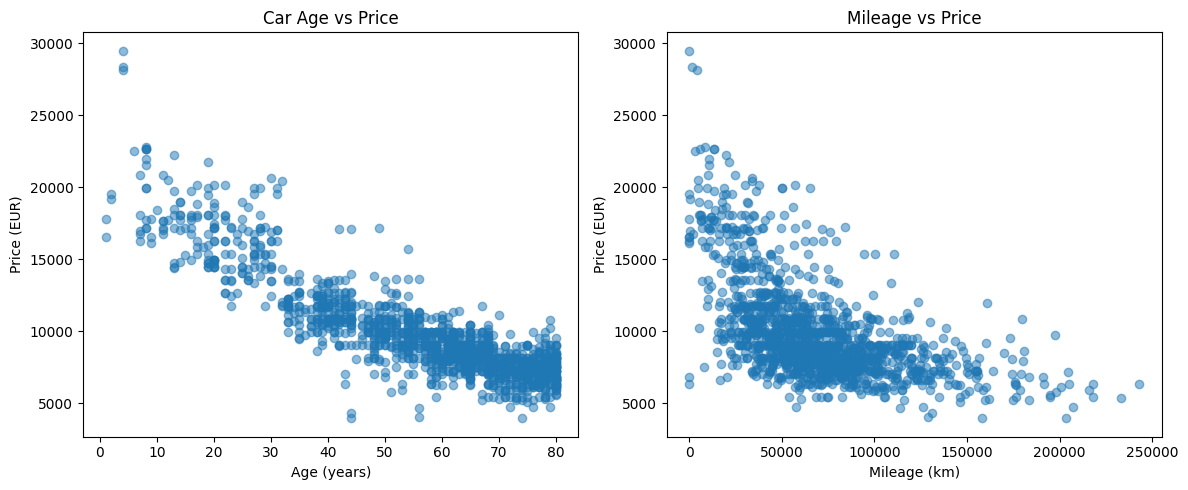

In [11]:
#TODO
# 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot: Age vs Price
ax1.scatter(df['Age'], df['Price'], alpha=0.5)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Price (EUR)')
ax1.set_title('Car Age vs Price')

# Second scatter plot: Mileage vs Price
ax2.scatter(df['Mileage'], df['Price'], alpha=0.5)
ax2.set_xlabel('Mileage (km)')
ax2.set_ylabel('Price (EUR)')
ax2.set_title('Mileage vs Price')

plt.tight_layout()
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [12]:
#TODO
pearson_corr = df['Price'].corr(df['Mileage'], method='pearson')
spearman_corr = df['Price'].corr(df['Mileage'], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}")

Pearson correlation coefficient: -0.564
Spearman correlation coefficient: -0.604


In [13]:
pearson_corr = df['Price'].corr(df['Age'], method='pearson')
spearman_corr = df['Price'].corr(df['Age'], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}")

Pearson correlation coefficient: -0.871
Spearman correlation coefficient: -0.832



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

//**//

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [14]:
#TODO

true_labels =      np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

# Correct / Total
def accuracy(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Arrays must have the same length")
    return np.sum(true_labels == predicted_labels) / len(true_labels)

def precision(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Arrays must have the same length")
    # tp / tp + fp | tp how many correct positive (1) predictions, fp how many incorrect 1 predicrions
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    return tp / (tp + fp)

def recall(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Arrays must have the same length")
    # tp / tp + fn | fn how many incorrect 0 predications
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fn = np.sum((true_labels==1) & (predicted_labels==0)) 
    return tp / (tp + fn)

def f1_score(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Arrays must have the same length")
    prec = precision(true_labels, predicted_labels)
    rec = recall(true_labels, predicted_labels)
    return (2 * prec * rec) / (prec + rec)

In [ ]:
import sklearn.metrics


print("My metrics: ")
print(accuracy(true_labels, predicted_labels))
print(precision(true_labels, predicted_labels))
print(recall(true_labels, predicted_labels))
print(f1_score(true_labels, predicted_labels))

print("\nSklearn metrics: ")
print(sklearn.metrics.accuracy_score(true_labels, predicted_labels))
print(sklearn.metrics.precision_score(true_labels, predicted_labels))
print(sklearn.metrics.recall_score(true_labels, predicted_labels))
print(sklearn.metrics.f1_score(true_labels, predicted_labels))

My metrics: 
0.7
0.6666666666666666
0.8
0.7272727272727272

Sklearn metrics: 
0.7
0.6666666666666666
0.8
0.7272727272727272



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [16]:
display(df.shape)

(1437, 10)

In [18]:
#TODO
# Decided to one-hot encode FuelType (Petrol, Deisel, CNG) and Doors(2-5) columns
df_encoded = pd.get_dummies(df, columns=['FuelType', 'Doors'], drop_first=True)

# num cols
num_columns = df_encoded.shape[1]
print(f"Number of columns after one-hot encoding: {num_columns}")

Number of columns after one-hot encoding: 13


B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [ ]:
#TODO
import sklearn.model_selection


X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# 80-20 split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Num samples in training set: {X_train.shape[0]}")
print(f"\nNum samples in testing set: {X_test.shape[0]}")

Num samples in training set: 1149

Num samples in testing set: 288


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

//**//

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [ ]:
#TODO
# standardize the features
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# !important: use the same scaler for the test set - ensure test data scaled the same as training data
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Print the average and standard deviation of the training set after standardization
print(f"Average of the training set after standardization: {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of the training set after standardization: {X_train_scaled.std(axis=0)}")

Average of the training set after standardization: [ 1.00000000e+00 -6.80241087e-17 -2.47360395e-17 -5.56560890e-17
 -4.63800741e-17 -4.32880692e-17  2.73642437e-16 -1.40299724e-15
  0.00000000e+00  9.27601483e-17 -6.80241087e-17 -7.73001236e-18
 -6.80241087e-17]
Standard deviation of the training set after standardization: [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

//**//

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [ ]:
#TODO
lin_regression_model = sm.OLS(y_train, X_train_scaled).fit()
print(lin_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     555.2
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:06:55   Log-Likelihood:                -9849.1
No. Observations:                1149   AIC:                         1.972e+04
Df Residuals:                    1136   BIC:                         1.979e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9897.8103     37.914    261.060      0.0

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [30]:
#TODO
# prediction on test data
y_pred = lin_regression_model.predict(X_test_scaled)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 1451.9463222402062


Your Response:

//**//

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [31]:
#TODO
# calculate r2
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R2: {r2}")

R2: 0.8218053455502459


Your Response:

//**//

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [ ]:
#TODO
# print the features so I can match them with the table of values
features = list(X_train.columns)
for f in features:
    print(f)

Age
Mileage
HP
MetColor
Automatic
CC
Weight
FuelType_Diesel
FuelType_Petrol
Doors_3
Doors_4
Doors_5


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

Your Response:

//**//

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

//**//

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

//**//


**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [39]:
#TODO
# add inverse_mileage
df_encoded['inverse_mileage'] = 1 / df_encoded['Mileage']
# train test split again
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# 80-20 split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# scale
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# !important: use the same scaler for the test set - ensure test data scaled the same as training data
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

lin_regression_model = sm.OLS(y_train, X_train_scaled).fit()
print(lin_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     516.0
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:41:19   Log-Likelihood:                -9845.3
No. Observations:                1149   AIC:                         1.972e+04
Df Residuals:                    1135   BIC:                         1.979e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9897.8103     37.807    261.801      0.0

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [42]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
display(data_df.head())
display(data_df.shape)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,sold_within_3_months
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,0


(1436, 11)


**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [43]:
#TODO
display(data_df['sold_within_3_months'].value_counts())

sold_within_3_months
1    880
0    556
Name: count, dtype: int64

- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [44]:
#TODO
df_encoded = pd.get_dummies(data_df, columns=['FuelType', 'Doors'], drop_first=True)


**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [45]:
#TODO
X = df_encoded.drop('sold_within_3_months', axis=1)
y = df_encoded['sold_within_3_months']

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [ ]:
#TODO
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [47]:
#TODO
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [48]:
#TODO
from sklearn.linear_model import LogisticRegression
log_regression_model = LogisticRegression(random_state=42)
log_regression_model.fit(X_train_scaled, y_train)
# predict on test data
y_pred = log_regression_model.predict(X_test_scaled)

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [53]:
#TODO
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.931


6. (2 pts) Calculate the precision, recall, and F1-score.

In [55]:
#TODO
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.933
Recall: 0.954
F1 score: 0.943


Confusion matrix:
 [[102  12]
 [  8 166]]


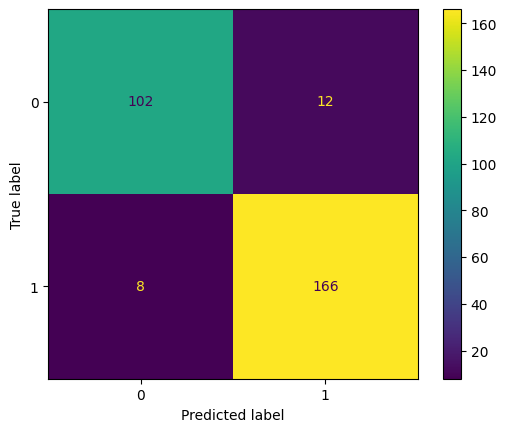

In [59]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n {confusion_matrix}")
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=log_regression_model.classes_)
disp.plot()
plt.show()

7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

In [27]:
#TODO

**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [28]:
#TODO

2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [29]:
#TODO

3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

In [30]:
#TODO

4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [31]:
#TODO

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//